In [1]:
import docplex
%load_ext autoreload
%autoreload 2

In [2]:
import csv
from integer_model import *
import os
import sys
import json
import pandas as pd
import numpy as np

In [6]:
# Manual solving

fname = "..\\..\\data\\VRPTW\\solomon_25\\C101.json"

tlim = 15

cvrptw_prob = VRPTW()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')
# solution = model.solve(TimeLimit=tlim)

best_known_solution: 191.3
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 251 variables, 277 constraints
 ! TimeLimit            = 15
 ! Initial process time : 0.02s (0.02s extraction + 0.00s propagation)
 !  . Log search space  : 1094.5 (before), 1094.5 (after)
 !  . Memory usage      : 2.0 MB (before), 2.0 MB (after)
 ! Using parallel search with 12 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        251                 -
 + New bound is 123.0999
                        0        148    1   F        -
 + New bound is 133.0892
 *      606.1000       25  0.07s        1      (gap is 78.04%)
 I Used: 10
 *      523.3000      203  0.07s        1      (gap is 74.57%)
 I Used: 9
        523.3000     1000         18    1        23 != P10
        523.3000     1000         13    2   F    17 != P15
 *     

In [3]:
# Using our solver

fname = "..\\..\\data\\VRPTW\\VRPTW\\solomon_25\\C101.json"
tlim = 5

instance = Integer_model()
instance.read_json(fname)

print('best_known_solution:', instance.instance['best_known_solution']['Distance'])
if instance.instance['best_known_solution'] is not None:
    print('best_known_solution:', instance.instance['best_known_solution']['Distance'])
    print('prdel')
else:
    print('best_known_solution: None')

instance.solve(tlim)
instance.visualize_solution()
instance.visualize_progress()
instance.display_solution()
instance.validate_solution()

TypeError: Can't instantiate abstract class Integer_model with abstract method build_model

In [ ]:
instance.save_to_json()

In [ ]:
# def load_optimal_values(json_data):
optimal_values_file = '..\\..\\data\\VRPTW\\optimals.csv'  # Specify the path to the CSV file
optimal_values = {}

with open(optimal_values_file, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=';')

    for row in csv_reader:
        instance_key = row.pop('Problem')  # Remove the instance key from the row
        optimal_values[instance_key] = row

# Call the function to load the optimal values and update the JSON data
# load_optimal_values(json_data)


In [ ]:
def get_best_known_solution(instance_name, N):
    # Function to retrieve the best known solution based on instance name and N
    return optimal_values.get(instance_name + '.' + str(N), None)

# def convert_data_to_json():
data_folder = '..\\..\\data\\VRPTW\\'  # Specify the folder name where the data files are located
cvrptw_prob = VRPTW()

for folder_name in os.listdir(data_folder):
    if not os.path.isdir(os.path.join(data_folder, folder_name)):
        continue

    print(folder_name)

    N = int(folder_name.split('_')[-1])  # Extract the value of N from the folder name
    folder_path = os.path.join(data_folder, folder_name)

    for filename in os.listdir(folder_path):
        instance_name = filename.split('.')[0]  # Extract the instance name from the file name
        instance_path = os.path.join(folder_path, filename)
        cvrptw_prob = VRPTW()
        print(instance_name)
        with open(instance_path, 'r') as f:
            instance = json.load(f)
        print(instance['best_known_solution'])
        print(get_best_known_solution(instance_name, N))
        instance['best_known_solution'] = get_best_known_solution(instance_name, N)
        instance['best_known_solution']['Distance'] = float(instance['best_known_solution']['Distance'])

        # Create the JSON object
        # json_obj = {
        #     'name': 'cvrptw',
        #     'N': N,
        #     'best_known_solution': get_best_known_solution(instance_name, N),
        #     'our_best_solution': '',
        #     'solutions': [],
        #     'data': instance_data,
        # }

        with open(instance_path, 'w') as json_file:
            json.dump(instance, json_file)
    #     break
    # break
# Save the JSON data to a file




# Call the function to convert the data to JSON
# convert_data_to_json()


24
802.2


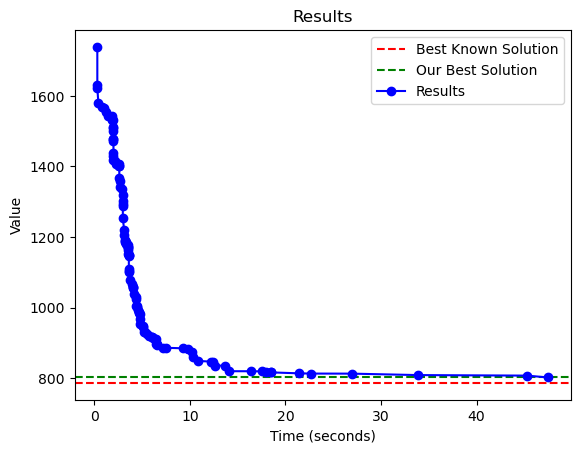

In [16]:
fname = "R109-24.json"
tlim = 60*1

instance1 = Integer_model()
instance1.read_json(fname)
print(instance1.instance['our_best_solution']['n_workers'])
print(instance1.instance['our_best_solution']['total_distance'])
instance1.visualize_progress(instance1.instance['our_best_solution'])

56
805.1


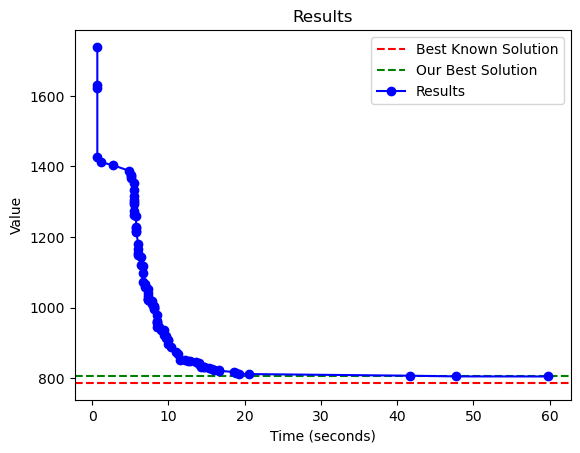

In [17]:
fname = "R109-56.json"
tlim = 60 * 1

instance2 = Integer_model()
instance2.read_json(fname)
print(instance2.instance['our_best_solution']['n_workers'])
print(instance2.instance['our_best_solution']['total_distance'])
instance2.visualize_progress(instance2.instance['our_best_solution'])

1
808.7


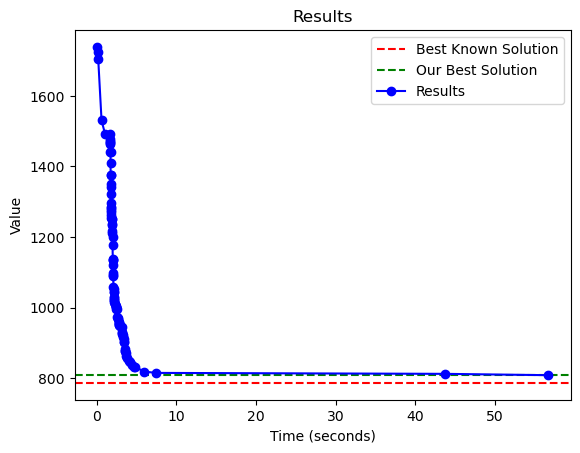

In [21]:
fname = "R109-56-1.json"
tlim = 60*1

instance3 = Integer_model()
instance3.read_json(fname)
print(instance3.instance['our_best_solution']['n_workers'])
print(instance3.instance['our_best_solution']['total_distance'])
instance3.visualize_progress(instance3.instance['our_best_solution'])

56
1020.9


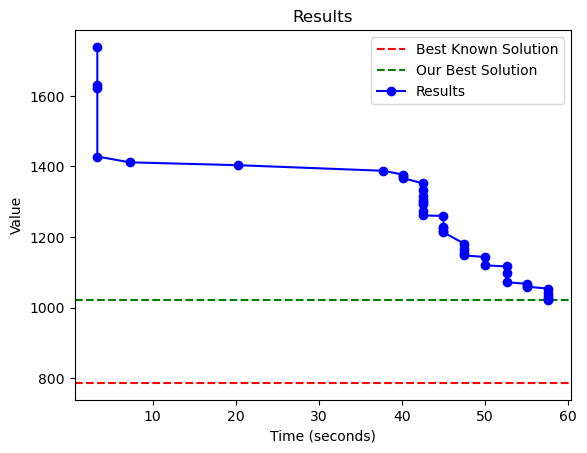

In [22]:
fname = "R109-56-56.json"
tlim = 60*1

instance = Integer_model()
instance.read_json(fname)
print(instance.instance['our_best_solution']['n_workers'])
print(instance.instance['our_best_solution']['total_distance'])
instance.visualize_progress(instance.instance['our_best_solution'])


24
802.2


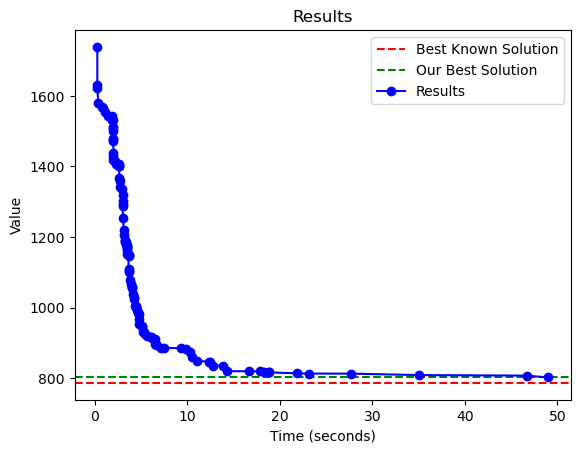

In [20]:
fname = "R109-24-24.json"
tlim = 60*1

instance = Integer_model()
instance.read_json(fname)
print(instance.instance['our_best_solution']['n_workers'])
print(instance.instance['our_best_solution']['total_distance'])
instance.visualize_progress(instance.instance['our_best_solution'])


In [64]:
data_folder = '..\\..\\data\\VRPTW'

ktimes = []
times = []
best = []
typee = []

def optimality(instance):
    known = instance['best_known_solution']
    our = instance['our_best_solution']

    if known is None or known['Distance'] == '' or our['total_distance'] < float(known['Distance']):
        return 'Best'
    elif our['total_distance'] == float(known['Distance']):
        return 'Good'
    else:
        return 'Bad'

for folder_name in os.listdir(data_folder):
    if not os.path.isdir(os.path.join(data_folder, folder_name)):
        continue
    N = int(folder_name.split('_')[-1])  # Extract the value of N from the folder name
    folder_path = os.path.join(data_folder, folder_name)
    print('folder_name:', folder_name)
    for filename in os.listdir(folder_path):
        if not filename.endswith('.json'):
            continue
        instance_name = filename.split('.')[0]  # Extract the instance name from the file name
        instance_path = os.path.join(folder_path, filename)
        print('instance_name:', instance_name)

        instance = Integer_model()
        instance.read_json(instance_path)

        if instance.instance['best_known_solution'] is not None:
            ktimes.append(instance.instance['best_known_solution']['Distance'])
        else:
            ktimes.append(-1)

        if instance.instance['our_best_solution'] is not None:
            # print('our_best_solution:', instance.instance['our_best_solution']['total_distance'], 'found in', instance.instance['our_best_solution']['search_progress'][-1][1], 's')
            times.append(instance.instance['our_best_solution']['search_progress'][-1][1])
            best.append(optimality(instance.instance))
            typee.append([str(N), 'RC' if instance_name[:2] == 'RC' else instance_name[0], instance_name[2] if instance_name[:2] == 'RC' else instance_name[1]])
        else:
            print('our_best_solution: None')

    #     break
    # break


folder_name: solomon_100
instance_name: C101
instance_name: C102
instance_name: C103
instance_name: C104
instance_name: C105
instance_name: C106
instance_name: C107
instance_name: C108
instance_name: C109
instance_name: C201
instance_name: C202
instance_name: C203
instance_name: C204
instance_name: C205
instance_name: C206
instance_name: C207
instance_name: C208
instance_name: R101
instance_name: R102
instance_name: R103
instance_name: R104
instance_name: R105
instance_name: R106
instance_name: R107
instance_name: R108
instance_name: R109
instance_name: R110
instance_name: R111
instance_name: R112
instance_name: R201
instance_name: R202
instance_name: R203
instance_name: R204
instance_name: R205
instance_name: R206
instance_name: R207
instance_name: R208
instance_name: R209
instance_name: R210
instance_name: R211
instance_name: RC101
instance_name: RC102
instance_name: RC103
instance_name: RC104
instance_name: RC105
instance_name: RC106
instance_name: RC107
instance_name: RC108
instanc

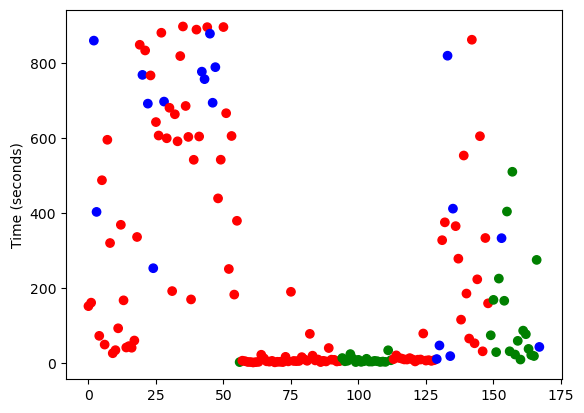

In [65]:
import matplotlib.pyplot as plt

best_values = ['r' if x == 'Best' else 'g' if x == 'Good' else 'b' for x in best]

# Plot the times and best values
plt.scatter(range(len(times)), times, c=best_values)

# Set the x-axis label
plt.ylabel('Time (seconds)')

# Display the plot
plt.show()


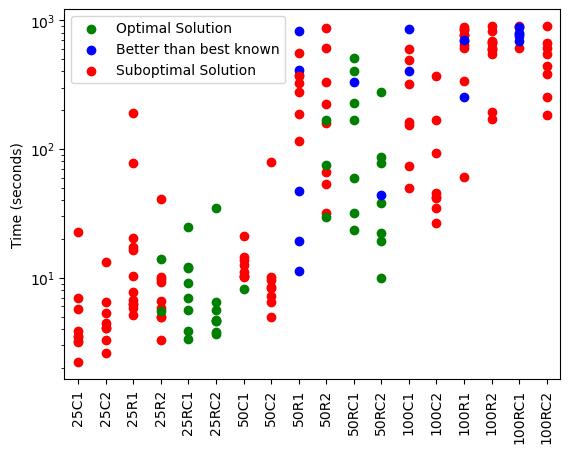

In [66]:
import matplotlib.pyplot as plt

# Create a set of unique typee values
unique_types = set(tuple(t) for t in typee)

# Sort the unique typee values based on the order of importance
sorted_types = sorted(unique_types, key=lambda x: (int(x[0]), x[1], x[2]))

# Create x-values representing the tree structure
x_values = [''.join(t) for t in sorted_types]

x_dict = {x: i for i, x in enumerate(x_values)}

# Create a dictionary to map each type to a color
type_colors = {'RC': 'r', 'C': 'g'}

# Plot the grouped results
for i, (t, b) in enumerate(zip(typee, best)):
    type_label = ''.join(t)
    type_color = best_values[i]#type_colors.get(t[1], 'b')
    # print(x_dict[type_label], type_label, times[i])
    plt.scatter(x_dict[type_label], times[i], c=type_color)

# Set the x-axis labels and limits
plt.xticks(range(len(x_values)), x_values, rotation=90)
plt.xlim(-0.5, len(x_values) - 0.5)

# Set the y-axis label
plt.yscale('log')
plt.ylabel('Time (seconds)')

legend_labels = ['Optimal Solution', 'Better than best known', 'Suboptimal Solution']
legend_colors = ['g', 'b', 'r']
# legend_markers = ['o', 's', 'x']
plt.legend(legend_labels, loc='best')
ax = plt.gca()
leg = ax.get_legend()
leg.legend_handles[0].set_color('green')
leg.legend_handles[1].set_color('blue')
leg.legend_handles[2].set_color('red')

# Display the plot
plt.show()


In [18]:


# Define the folder path containing the JSON files

# Initialize an empty list to store the dataframes
dfs = []

# Iterate over the files in the folder

data_folder = '..\\..\\data\\VRPTW\\VRPTW\\'  # Specify the folder name where the data files are located
cvrptw_prob = VRPTW()

for folder_name in os.listdir(data_folder):
    if not os.path.isdir(os.path.join(data_folder, folder_name)):
        continue
    folder_path = os.path.join(data_folder, folder_name)
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            # Read the JSON file

            instance_name = filename.split('.')[0]
            file_path = os.path.join(folder_path, filename)
            with open(file_path) as f:
                data = json.load(f)

            # Extract the required data from the JSON
            name = data['name']
            N = data['N']
            best_known_solution = data['best_known_solution']
            our_best_solution = data['our_best_solution']

            horizon = instance_name[2] if instance_name[:2] == 'RC' else instance_name[1]

            # Create a DataFrame with the extracted data
            df = pd.DataFrame({
                'name': [name],
                'N': [N],
                'horizon': 'short' if horizon == '1' else 'long',
                'sampling': 'RC' if instance_name[:2] == 'RC' else instance_name[0],
                'best_known_dist': float(best_known_solution['Distance']) if best_known_solution is not None and best_known_solution['Distance'] != '' else -1,
                'our_best_dist': our_best_solution['total_distance'],
                'our_best_time': our_best_solution['search_progress'][-1][1],
                'diff': float(best_known_solution['Distance']) - our_best_solution['total_distance'] if best_known_solution is not None and best_known_solution['Distance'] != '' else None,
                'best_known_solution': [best_known_solution],
                'our_best_solution': [our_best_solution],
                'solutions': [data['solutions']]
            })

            # Append the DataFrame to the list
            dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

# Display the resulting DataFrame
print(result_df)


       name    N horizon sampling  best_known_dist  our_best_dist  \
0    cvrptw  100   short        C           828.94          827.3   
1    cvrptw  100   short        C           828.94          827.3   
2    cvrptw  100   short        C           828.06          856.2   
3    cvrptw  100   short        C           824.78          847.4   
4    cvrptw  100   short        C           828.94          827.3   
..      ...  ...     ...      ...              ...            ...   
163  cvrptw   50    long       RC           444.20          444.2   
164  cvrptw   50    long       RC           630.20          630.2   
165  cvrptw   50    long       RC           610.00          610.0   
166  cvrptw   50    long       RC           558.60          558.6   
167  cvrptw   50    long       RC           476.70          489.1   

     our_best_time   diff                                best_known_solution  \
0           152.39   1.64  {'NV': '10', 'Distance': 828.94, 'Authors': 'RT'}   
1          

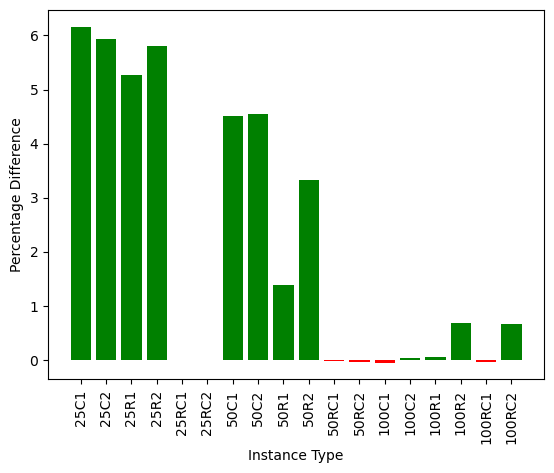

In [19]:
# Plot the precentage difference between best_known_solution distance and our_best_solution total_distance

import matplotlib.pyplot as plt

# Calculate the difference between best_known_solution distance and our_best_solution total_distance

result_df['distance_difference'] = result_df.apply(
    lambda row: (float(row['best_known_solution']['Distance']) - row['our_best_solution']['total_distance']) / float(row['best_known_solution']['Distance'])
    if row['best_known_solution'] is not None and row['best_known_solution']['Distance'] != ""
    else 0,
    axis=1
)

# Sum all the differences for each sampling type
sum_df = result_df.groupby(['sampling', 'horizon', 'N'])['distance_difference'].sum().reset_index()

sum_df['name'] = sum_df.apply(
    lambda row: str(row['N']) + str(row['sampling']) + ('2' if row['horizon'] == 'long' else '1'),
    axis=1
)

# Sort the dataframe by name
sum_df = sum_df.sort_values(by=['N', 'name'])

# Plot the difference, negative values are red

plt.bar(range(len(sum_df)), sum_df['distance_difference'], color=['r' if x < 0 else 'g' for x in sum_df['distance_difference']])

# Set the x-axis label and tick labels
plt.xlabel('Instance Type')
plt.xticks(range(len(sum_df)), sum_df['name'], rotation='vertical')

# Set the y-axis label
plt.ylabel('Percentage Difference')

# Display the plot
plt.show()

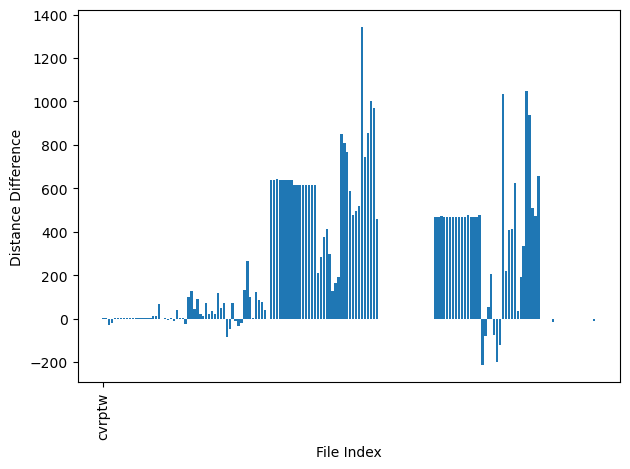

In [20]:
import matplotlib.pyplot as plt

# Calculate the difference between best_known_solution distance and our_best_solution total_distance
result_df['distance_difference'] = result_df.apply(
    lambda row: float(row['best_known_solution']['Distance']) - row['our_best_solution']['total_distance']
    if row['best_known_solution'] is not None and row['best_known_solution']['Distance'] != ""
    else None,
    axis=1
)

# Filter out rows where distance_difference is None
filtered_df = result_df.dropna(subset=['distance_difference'])

# Plot the difference
plt.bar(filtered_df.index, filtered_df['distance_difference'])

# Set the x-axis label and tick labels
plt.xlabel('File Index')
uni = filtered_df['name'].unique()
plt.xticks(range(len(uni)), uni, rotation='vertical')

# Set the y-axis label
plt.ylabel('Distance Difference')

# Display the plot
plt.tight_layout()
plt.show()


In [21]:
#save df

result_df.to_csv('..\\..\\data\\VRPTW\\VRPTW\\result_df.csv', index=False)


In [3]:
#load df

result_df = pd.read_csv('..\\..\\data\\VRPTW\\VRPTW\\result_df.csv')

In [12]:
# Compare distances from integer model and OR-tools

values = []

# Iterate over the files in the folder

data_folder = '..\\..\\data\\VRPTW\\VRPTW\\'  # Specify the folder name where the data files are located
cvrptw_prob = VRPTW()

for folder_name in os.listdir(data_folder):
    if not os.path.isdir(os.path.join(data_folder, folder_name)):
        continue
    folder_path = os.path.join(data_folder, folder_name)
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            # Read the JSON file

            instance_name = filename.split('.')[0]
            file_path = os.path.join(folder_path, filename)
            with open(file_path) as f:
                data = json.load(f)

            # Extract the required data from the JSON

            values.append([data['solutions'][0]['total_distance'], data['solutions'][1]['total_distance']])


In [14]:
# Plot the difference between values from integer model and OR-tools

import matplotlib.pyplot as plt

# Calculate the difference between values from integer model and OR-tools
tools = [0 for x in values]
for idx, value in enumerate(values):
    tools[idx] = value[1]/value[0]

<BarContainer object of 168 artists>

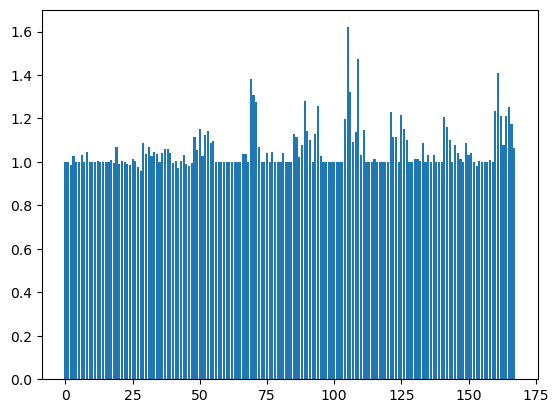

In [16]:
# Plot tools

plt.bar(range(len(tools)), tools)


In [3]:
# OG ORsolver

from ORsolver import *

path = '..\\..\\data\\VRPTW\\solomon_25\\C101.json'

cvrptw_prob = VRPTW()
with open(path) as f:
    instance = json.load(f)
cvrptw_prob.from_dict(instance['data'])

time_precision_scaler = 10
solver = Solver(time_precision_scaler)
solver.load_instance(cvrptw_prob)
solver.create_model()
settings = {'time_limit': int(instance['our_best_solution']['search_progress'][-1][1]+5)}
solver.solve_model(settings)
# solver.print_solution()
out = solver.output()
instance['solutions'].append(out)


In [5]:
# New ORsolver

from ORsolver import *

tlim = 10
path = '..\\..\\data\\VRPTW\\solomon_25\\C101.json'

instance = ORsolver()
instance.read_json(path)
instance.solve(tlim)
instance.validate_solution()
instance.display_solution()

[[0, 20, 24, 25, 23, 22, 21, 0], [0, 5, 3, 7, 8, 10, 11, 9, 6, 4, 2, 1, 0], [0, 13, 17, 18, 19, 15, 16, 14, 12, 0]]
Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 20 is 100
Node 20 arrive 100 early 100 late 730 start 100
Distance from 20 to 24 is 50
Node 24 arrive 1050 early 650 late 1440 start 1050
Distance from 24 to 25 is 20
Node 25 arrive 1970 early 1690 late 2240 start 1970
Distance from 25 to 23 is 42
Node 23 arrive 2912 early 7320 late 7770 start 7320
Distance from 23 to 22 is 30
Node 22 arrive 8250 early 8120 late 8830 start 8250
Distance from 22 to 21 is 20
Node 21 arrive 9170 early 9140 late 9650 start 9170
Distance from 21 to 0 is 101
Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 5 is 151
Node 5 arrive 151 early 150 late 670 start 151
Distance from 5 to 3 is 10
Node 3 arrive 1061 early 650 late 1460 start 1061
Distance from 3 to 7 is 20
Node 7 arrive 1981 early 1700 late 2250 start 1981
Distance from 7 to 8 is 28
Node 8 arrive 2909 early 2550 late 3240

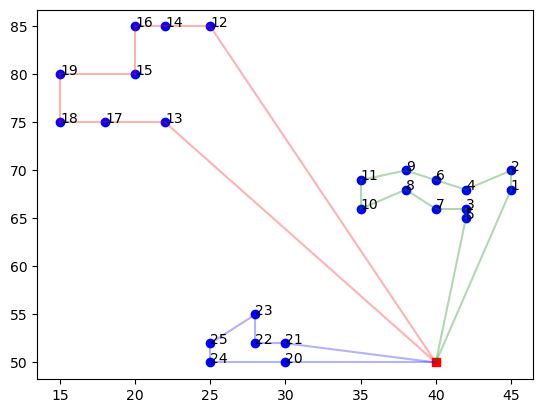

In [6]:
instance.visualize_solution()

In [16]:
# add cost to ORsolver solutions

from ORsolver import *

folder_path = '..\\..\\data\\VRPTW\\VRPTW\\solomon_100'

folder_name = os.path.basename(folder_path)
# N = int(folder_name.split('_')[-1])  # Extract the value of N from the folder name
# folder_path = os.path.join(data_folder, folder_name)
print('folder_name:', folder_name)
for filename in os.listdir(folder_path):
    if not filename.endswith('.json'):
        continue
    # folder_name = 'solomon_25'
    # filename = 'R112.json'
    instance_name = filename.split('.')[0]  # Extract the instance name from the file name
    print('instance_name:', instance_name)
    instance_path = os.path.join(folder_path, filename)

    path = instance_path
    instance = ORsolver()
    instance.read_json(path)

    solution = instance.instance['solutions'][1]

    solution['total_distance'] = path_to_distance(solution, instance.data)

    instance.instance['solutions'][1]['total_distance'] = solution['total_distance']
    instance.instance['solutions'][1].pop('distance', None)
    # print(instance.instance['solutions'][1])
    instance.save_to_json()

folder_name: solomon_100
instance_name: C101
instance_name: C102
instance_name: C103
instance_name: C104
instance_name: C105
instance_name: C106
instance_name: C107
instance_name: C108
instance_name: C109
instance_name: C201
instance_name: C202
instance_name: C203
instance_name: C204
instance_name: C205
instance_name: C206
instance_name: C207
instance_name: C208
instance_name: R101
instance_name: R102
instance_name: R103
instance_name: R104
instance_name: R105
instance_name: R106
instance_name: R107
instance_name: R108
instance_name: R109
instance_name: R110
instance_name: R111
instance_name: R112
instance_name: R201
instance_name: R202
instance_name: R203
instance_name: R204
instance_name: R205
instance_name: R206
instance_name: R207
instance_name: R208
instance_name: R209
instance_name: R210
instance_name: R211
instance_name: RC101
instance_name: RC102
instance_name: RC103
instance_name: RC104
instance_name: RC105
instance_name: RC106
instance_name: RC107
instance_name: RC108
instanc

In [29]:

out = solver.output()
instance['solutions'].append(out)
print(out)

{'distance': 0, 'vehicles': 3, 'time': 13, 'solver': 'OR-Tools', 'paths': [[0, 20, 24, 25, 23, 22, 21, 0], [0, 5, 3, 7, 8, 10, 11, 9, 6, 4, 2, 1, 0], [0, 13, 17, 18, 19, 15, 16, 14, 12, 0]]}


In [15]:
# print solver data, sorted by key

for key, value in sorted(solver.data.items()):
    print(key, value)


demands [0, 10, 30, 10, 10, 10, 20, 20, 20, 10, 10, 10, 20, 30, 10, 40, 40, 20, 20, 10, 10, 20, 20, 10, 10, 40]
depot 0
num_vehicles 25
service_times [0, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900, 900]
time_matrix [[0, 1086, 1106, 1061, 1081, 1051, 1090, 1060, 1081, 1100, 1067, 1096, 1280, 1208, 1293, 1260, 1303, 1233, 1253, 1290, 1000, 1001, 1021, 1030, 1050, 1051], [186, 0, 920, 936, 930, 942, 950, 953, 970, 972, 1001, 1000, 1162, 1140, 1186, 1177, 1202, 1178, 1208, 1223, 1134, 1119, 1133, 1114, 1169, 1156], [206, 920, 0, 950, 936, 958, 950, 964, 972, 970, 1007, 1000, 1150, 1135, 1174, 1169, 1191, 1174, 1204, 1216, 1150, 1134, 1147, 1126, 1182, 1169], [161, 936, 950, 0, 920, 910, 936, 920, 944, 956, 970, 976, 1154, 1119, 1175, 1160, 1190, 1156, 1184, 1204, 1100, 1084, 1097, 1078, 1133, 1120], [181, 930, 936, 920, 0, 930, 922, 928, 940, 944, 972, 970, 1140, 1111, 1162, 1150, 1178, 1150, 1178, 1195, 1116, 1100

In [9]:
from integer_model import *

fname = "..\\..\\data\\VRPTW\\VRPTW\\solomon_25\\C101.json"

tlim = 10

cvrptw_prob = VRPTW()
with open(fname, 'r') as f:
    instance = json.load(f)
    best = instance['our_best_solution']
    cplex = instance['solutions'][0]
    or_tools = instance['solutions'][1]

In [25]:
for key in solution.solution.var_solutions_dict:
    value = solution.solution.var_solutions_dict[key]
    print(type(value))
    if type(value) == 'CpoSequenceVarSolution' or value.presence:
        print(key, solution.solution.var_solutions_dict[key])
    # break


<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolution'>
<class 'docplex.cp.solution.CpoIntervalVarSolu

AttributeError: 'CpoSequenceVarSolution' object has no attribute 'presence'